In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas

############# Pré-processamento ###############
# Coleta e Integração
arquivo = pandas.read_csv('dados_dengue.csv')

anos = arquivo[['ano']]
casos = arquivo[['casos']]
 
############## Mineração #################
regr = LinearRegression()
regr.fit(X=anos, y=casos)
 
ano_futuro = [[2018]]
casos_2018 = regr.predict(ano_futuro)
 
print('Casos previstos para 2018 ->', int(casos_2018))
 
############ Pós-processamento ################
plt.scatter(anos, casos, color='black')
plt.scatter(ano_futuro, casos_2018, color='red')
plt.plot(anos, regr.predict(anos), color='blue')
 
plt.xlabel('Anos')
plt.ylabel('Casos de dengue')
plt.xticks([2018])
plt.yticks([int(casos_2018)])
 
plt.show()

In [ ]:
from sklearn.datasets import load_iris, fetch_kddcup99
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.svm import SVC
 
################## Pré-processamento ###################
# Coleta e Integração
iris = load_iris()
 
caracteristicas = iris.data
rotulos = iris.target
 
print("Caracteristicas:\n", caracteristicas[:2])
print("Rótulos:\n", rotulos[:2])
print('########################################################')
 
# Partição dos dados
carac_treino, carac_teste, rot_treino, rot_teste = train_test_split(caracteristicas, rotulos)
 
################### Mineração #####################
 
############---------- Arvore de Decisão -----------############
arvore = DecisionTreeClassifier(max_depth=2)
arvore.fit(X=carac_treino, y=rot_treino)
 
rot_preditos = arvore.predict(carac_teste)
acuracia_arvore = accuracy_score(rot_teste, rot_preditos)
############-------- Máquina de Vetor Suporte ------############
clf = SVC()
clf.fit(X=carac_treino, y=rot_treino)
 
rot_preditos_svm = clf.predict(carac_teste)
acuracia_svm = accuracy_score(rot_teste, rot_preditos_svm)
 
################ Pós-processamento ####################
print("Acurácia Árvore de Decisão:", round(acuracia_arvore, 5))
print("Acurácia SVM:", round(acuracia_svm, 5))
print('########################################################')
 
r = export_text(arvore, feature_names=iris['feature_names'])
print("Estrutura da árvore")
print(r)

data test:
[ 5 20 14 32 22 38]
data predict:
[ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


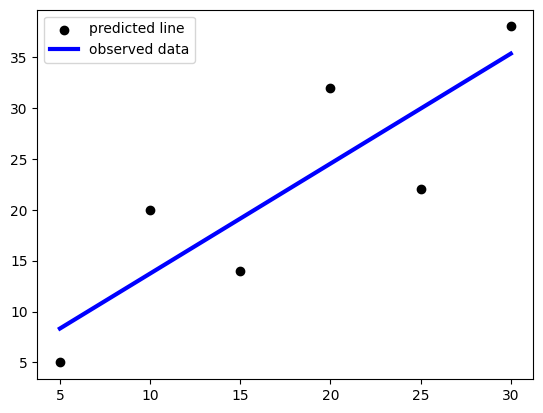

In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

x = np.array([5,10,15,20,25,30]).reshape((-1, 1))
y = np.array([5,20,14,32,22,38])

model = LinearRegression().fit(x, y)

y_pred = model.predict(x)
print('data test:', y, sep='\n')
print('data predict:', y_pred, sep='\n')

plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.legend(['predicted line', 'observed data'])
plt.show()